# EDA 분석
#1. import 및 read.csv

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

os.chdir("/content/drive/MyDrive/project")
os.getcwd()

'/content/drive/MyDrive/project'

In [6]:
import numpy as np
import pandas as pd

In [7]:
profile = pd.read_csv('profile.csv', encoding = 'utf8')
transcript = pd.read_csv('transcript.csv',encoding = 'utf8')
portfolio = pd.read_csv('portfolio.csv',encoding = 'utf8')

In [8]:
#컬럼 및 데이터 형태 확인
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


# 2. 결측치 제거

In [9]:
profile.isnull().sum()

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [10]:
portfolio.isnull().sum()

Unnamed: 0    0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [11]:
transcript.isnull().sum()

Unnamed: 0    0
person        0
event         0
value         0
time          0
dtype: int64

In [12]:
#gender와 income에 결측치가 있는 데이터들을 삭제
profile = profile.dropna()

In [13]:
profile.isnull().sum()

Unnamed: 0          0
gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

# 3. [Profile] 분석



In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

### (1) 성별, 연령, 소득별 

In [15]:
#1) age 분석
age_range_labels = ['~24','25-39','40-59','60-79','80~']
age_range_bins = [24, 25, 39, 59, 79, 80]

#pd.cut: 구간 나누기, pd.Categorical: 범주형으로 변경
profile['age_range'] = pd.cut(profile['age'], bins = age_range_bins, labels = age_range_labels, right = False)
profile['age_range'] = pd.Categorical(profile['age_range'], ordered = True, categories = age_range_labels)

profile.dtypes

Unnamed: 0             int64
gender                object
age                    int64
id                    object
became_member_on       int64
income               float64
age_range           category
dtype: object

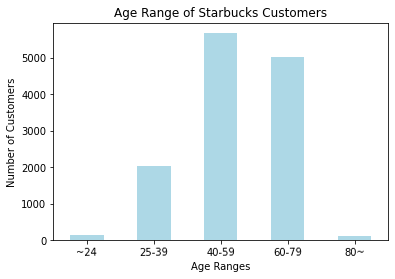

In [16]:
#age_range에 따른 bar plot: value_counts() 이용
profile['age_range'].value_counts().sort_index().plot(kind = 'bar', color = 'LightBlue')
plt.ylabel('Number of Customers')
plt.xlabel('Age Ranges')
plt.xticks(rotation=1, horizontalalignment="center")
plt.title('Age Range of Starbucks Customers')
plt.show()

In [17]:
#2) gender 분석

#gender 데이터 분포 확인
profile.gender.unique()
profile['gender'].value_counts(dropna = False)

M    8484
F    6129
O     212
Name: gender, dtype: int64

labels =  ['M', 'F', 'O']
ratio =  [8484, 6129, 212]


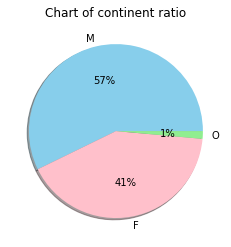

In [18]:
#gender 분포 파이차트로 나타내기

labels = profile['gender'].value_counts().index.tolist() #ilist 값으로 변경해줘야 함
ratio = profile['gender'].value_counts().values.tolist()
print('labels = ', labels)
print('ratio = ' , ratio)

plt.pie(ratio, labels=labels, autopct='%.0f%%', shadow=True, colors= ['skyblue', 'pink', 'lightgreen'])
plt.title('Chart of continent ratio')
plt.show()

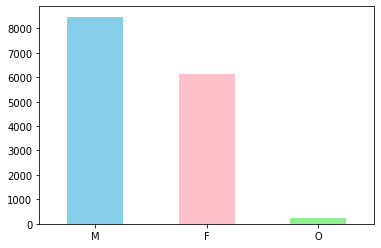

In [19]:
#gender 분포 bar plot으로 나타내기

profile['gender'].value_counts().plot(kind='bar', color= ['skyblue', 'pink', 'lightgreen'])
plt.xticks(rotation=1, horizontalalignment="center")
plt.show()

In [20]:
#범주 정의
bins=[0,30000,60000,90000,120000]

#범주화 이름 정의
bins_names = ['~3M','~6M','~9M','~12M']

#데이터 범주화
profile['income_categories'] = pd.cut(profile['income'], bins, labels = bins_names)

In [21]:
#profile에 income_categories 생성, ascending으로 오름차순 정렬
profile = profile.sort_values('income_categories', ascending = True)

In [22]:
#범주별로 나뉘어졌는지 확인
profile['income_categories'].head()

13612    ~3M
4241     ~3M
7574     ~3M
231      ~3M
10022    ~3M
Name: income_categories, dtype: category
Categories (4, object): ['~3M' < '~6M' < '~9M' < '~12M']

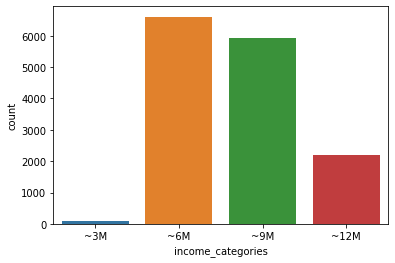

In [23]:
#소득별 가입 분포: 3만~9만의 소득인 사람들이 주로 가입
sns.countplot(x = 'income_categories', data = profile)

### (2) 신규 가입자 추이 확인

In [24]:
#월별 가입자 수를 알고 싶기 때문에 '%Y-%m' 기준으로 groupby
#x축을 월별로 보여줘야하므로 profile_month 생성
profile['became_member_on'] = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile_month = profile.groupby(profile['became_member_on'].dt.strftime("%Y-%m")).sum()
print(profile_month)

                  Unnamed: 0    age      income
became_member_on                               
2013-07                29446    277    321000.0
2013-08               545744   3480   3844000.0
2013-09               418365   2771   3205000.0
2013-10               408389   2704   3090000.0
2013-11               376542   2462   2474000.0
...                      ...    ...         ...
2018-03              4574939  28434  33153000.0
2018-04              4345327  27208  31005000.0
2018-05              4563903  27734  32680000.0
2018-06              4052001  26327  29864000.0
2018-07              3800925  23988  28112000.0

[61 rows x 3 columns]


In [25]:
#가입자 분석 시 index를 사용하여 데이터프레임이 변경되므로 사본 변수 생성
profile_member = pd.read_csv('profile.csv', encoding = 'utf8')
profile_member = profile.dropna()

#int64의 형태를 datetime으로 바꿔줌
profile_member['datetime'] = profile['became_member_on']
profile_member.info() #변경 상태 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12986 entries, 13612 to 1
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         12986 non-null  int64         
 1   gender             12986 non-null  object        
 2   age                12986 non-null  int64         
 3   id                 12986 non-null  object        
 4   became_member_on   12986 non-null  datetime64[ns]
 5   income             12986 non-null  float64       
 6   age_range          12986 non-null  category      
 7   income_categories  12986 non-null  category      
 8   datetime           12986 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 837.4+ KB


<ipython-input-25-64c317ed0f28>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_member['datetime'] = profile['became_member_on']


In [26]:
#datetime을 index로 두도록 한 후, 필요없어진 datetime 열을 삭제
profile_member['all_news_num']=1
profile_member.set_index(profile_member['datetime'], inplace=True)
profile_member = profile_member.drop('datetime',1)
profile_member

<ipython-input-26-6ef3129421c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_member['all_news_num']=1
<ipython-input-26-6ef3129421c3>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  profile_member = profile_member.drop('datetime',1)


,Unnamed: 0,gender,age,id,became_member_on,income,age_range,income_categories,all_news_num
datetime,,,,,,,,,
2017-04-13,13612,M,25,c100c7f877fd45d7ab09717bf812dc47,2017-04-13,30000.0,25-39,~3M,1
2018-02-19,4241,M,55,a1a85bdfc4644774aeaf1b75552e89ba,2018-02-19,30000.0,40-59,~3M,1
2017-10-27,7574,M,29,8b4fdc40b3fa43e0a3c392cc4048150e,2017-10-27,30000.0,25-39,~3M,1
2018-03-21,231,M,71,18174519037241e9b1ddcb627ca4dc41,2018-03-21,30000.0,60-79,~3M,1
2017-08-19,10022,F,33,1f9b6e1cebeb48dcb6cd5965b408c989,2017-08-19,30000.0,25-39,~3M,1
...,...,...,...,...,...,...,...,...,...
2015-12-25,5414,F,69,f2c038ac9ea84e26bee2b0071be4edc6,2015-12-25,112000.0,60-79,~12M,1
2017-08-19,5412,F,77,1029b283ed2d4fa8b3a97e2063fc8d4e,2017-08-19,105000.0,60-79,~12M,1
2017-08-08,5407,M,54,c55582773fa24fb8a0e217851a2b23ae,2017-08-08,119000.0,40-59,~12M,1


In [27]:
monthly_profile = profile_member.resample('M').sum()

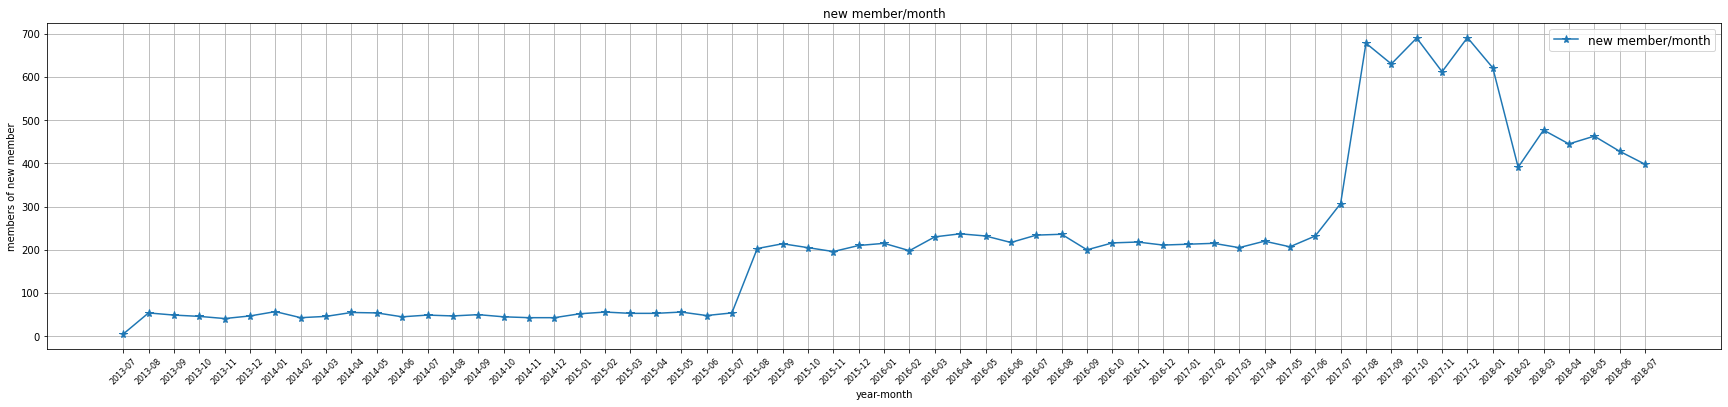

In [28]:
import warnings
plt.figure(figsize=(30, 6)) # 그래프 사이즈 지정
plt.xticks(size=8, rotation=45) # x축 눈금 라벨 폰트 사이즈 8로 지정하고 45도 회전

#월별 가입자 그래프 작성
plt.plot(profile_month.index,monthly_profile['all_news_num'],marker='*',markersize=8)
plt.title('new member/month')
plt.xlabel('year-month')
plt.ylabel('members of new member')
plt.legend(labels=['new member/month'], loc='best', fontsize=12)
plt.grid(True)
plt.show()
warnings.filterwarnings(action='ignore')



In [29]:
#연도별 추세 그래프

# [Transcrtipt]&[Portfolio] 분석

###(1) JOIN

In [30]:
#transcript.value: dictionary의 형태이므로 값 분리

transcript.value = transcript.value.apply(lambda x:eval(x))
#apply(): dataframe의 칼럼에 복잡한 연산을 vectorizing, lambda나 사용자정의함수 사용
#eval(x): x값을 내보내라
#->apply(lambda x:eval(x)): value에 있는 x값을 vectorizing해서 보여주기

transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [31]:
transcript.info() #transcript 데이터터 유형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [32]:
#transcript의의 key값이 뭔지 인덱싱으로 확인
list(transcript.value[306532].keys())[0]

'amount'

In [33]:
transcript["value_id"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["id"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

,Unnamed: 0,person,event,value,time,value_id,id
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.59
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3.53


In [34]:
#event가 transaction인 데이터는 id가 nan 값으로 나오므로 임의로 'information' id로 변경

transcript["id"]=transcript[transcript["value_id"]!='amount'].id.apply(lambda x: x)
transcript=transcript.fillna("3f207df678b143eea3cee63160fa8bed")

transcript

,Unnamed: 0,person,event,value,time,value_id,id
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,3f207df678b143eea3cee63160fa8bed
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,3f207df678b143eea3cee63160fa8bed
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3f207df678b143eea3cee63160fa8bed
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3f207df678b143eea3cee63160fa8bed


In [35]:
#portfolio 와 join해서 분포 확인하기
join_offer = pd.merge(transcript, portfolio, how="left", on="id")
join_offer

,Unnamed: 0_x,person,event,value,time,value_id,id,Unnamed: 0_y,reward,channels,difficulty,duration,offer_type
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,4,5,"['web', 'email']",20,10,discount
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5,9,2,"['web', 'email', 'mobile']",10,7,discount
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,3f207df678b143eea3cee63160fa8bed,2,0,"['web', 'email', 'mobile']",0,4,informational
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,3f207df678b143eea3cee63160fa8bed,2,0,"['web', 'email', 'mobile']",0,4,informational
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3f207df678b143eea3cee63160fa8bed,2,0,"['web', 'email', 'mobile']",0,4,informational
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3f207df678b143eea3cee63160fa8bed,2,0,"['web', 'email', 'mobile']",0,4,informational


### (2) offer type별 참여율
: tableau 활용

In [36]:
from imageio import imread

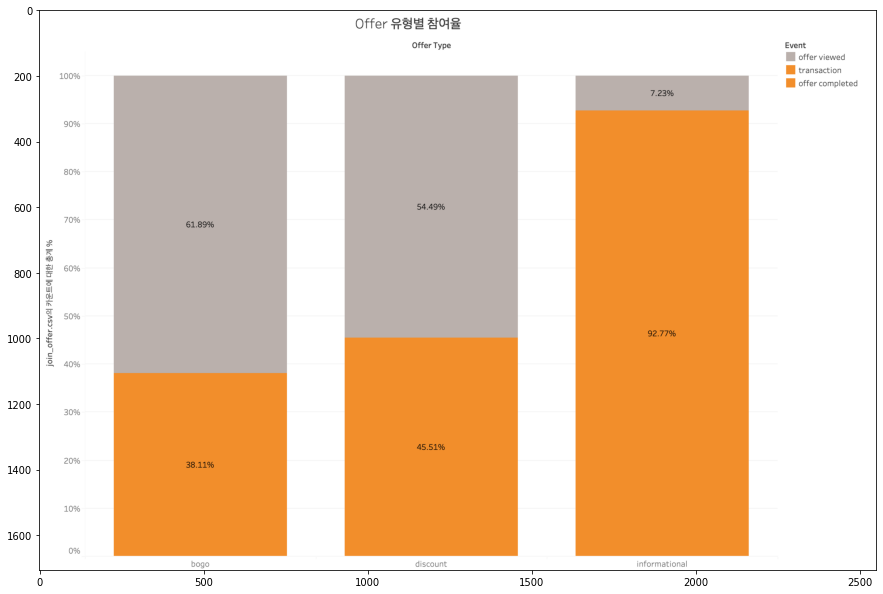

In [37]:
img_offer = imread('유형별 참여율_최종.png')
plt.figure(figsize=(15,13))
plt.imshow(img_offer)

#informational offer는 의미가 없어서 bogo/discount offer 

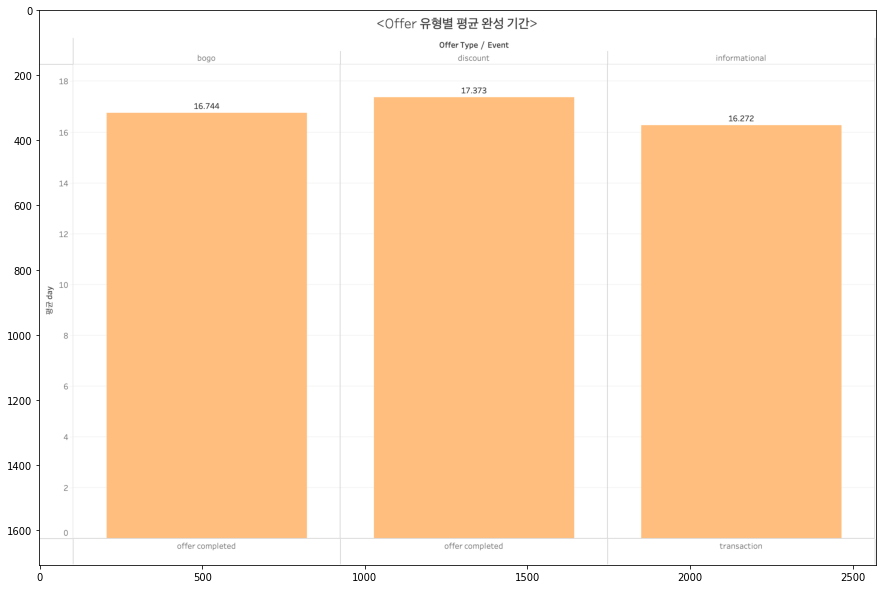

In [38]:
img_mean = imread('mean(day)_최종.png')
plt.figure(figsize=(15,13))
plt.imshow(img_mean)

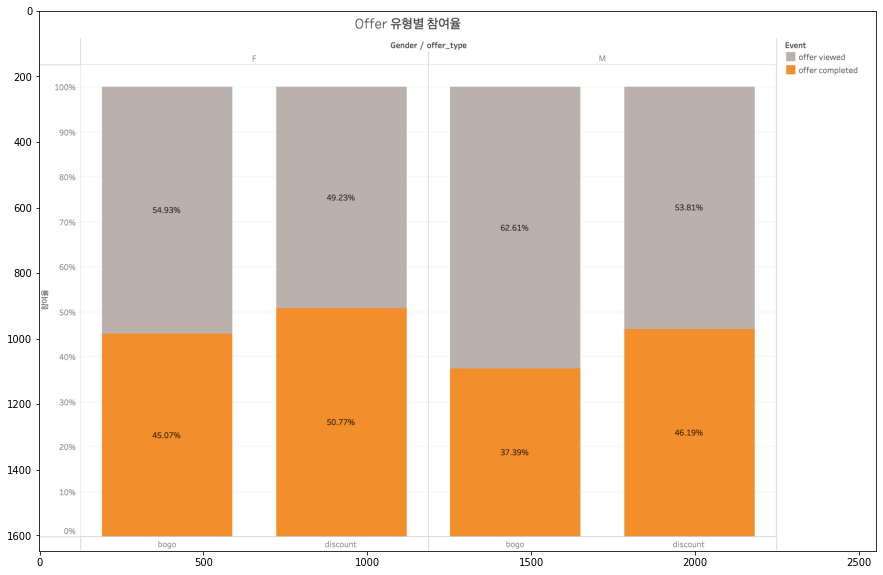

In [39]:
#성별 - offer
img_offer = imread('gender_offertype.png')
plt.figure(figsize=(15,13))
plt.imshow(img_offer)

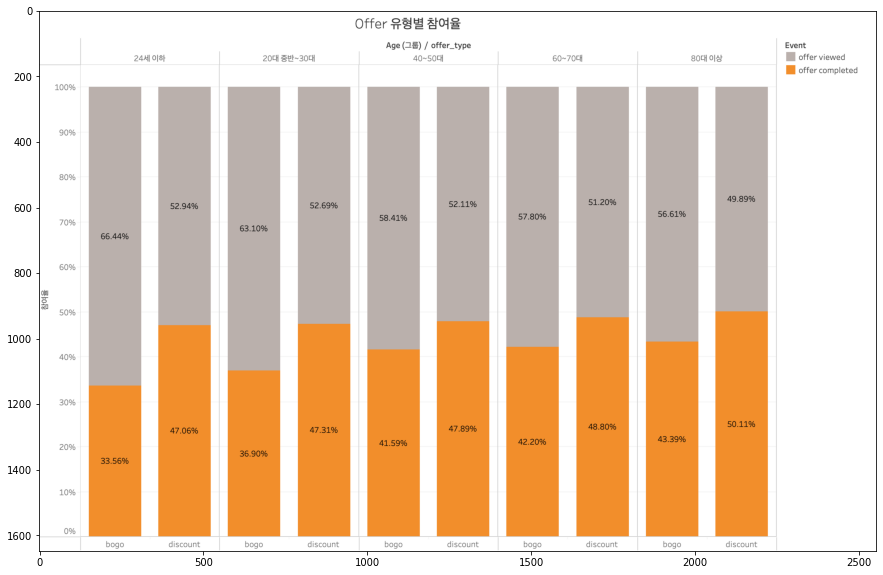

In [40]:
# age - offer
img_offer = imread('age_offertype.png')
plt.figure(figsize=(15,13))
plt.imshow(img_offer)

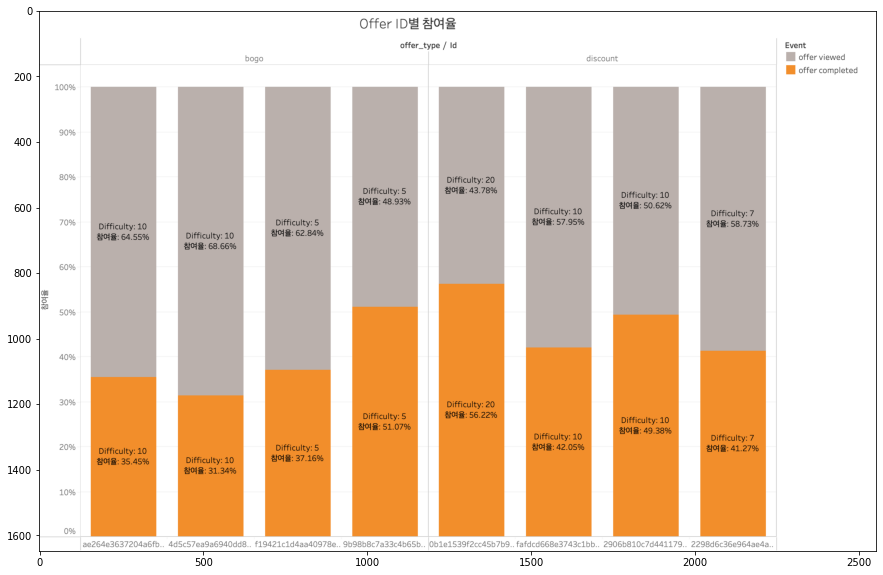

In [41]:
#id별 참여율 - bogo < discount 임을 재확인 
#difficulty와는 상관관계가 없어보임

img_offer = imread('id_offertype.png')
plt.figure(figsize=(15,13))
plt.imshow(img_offer)

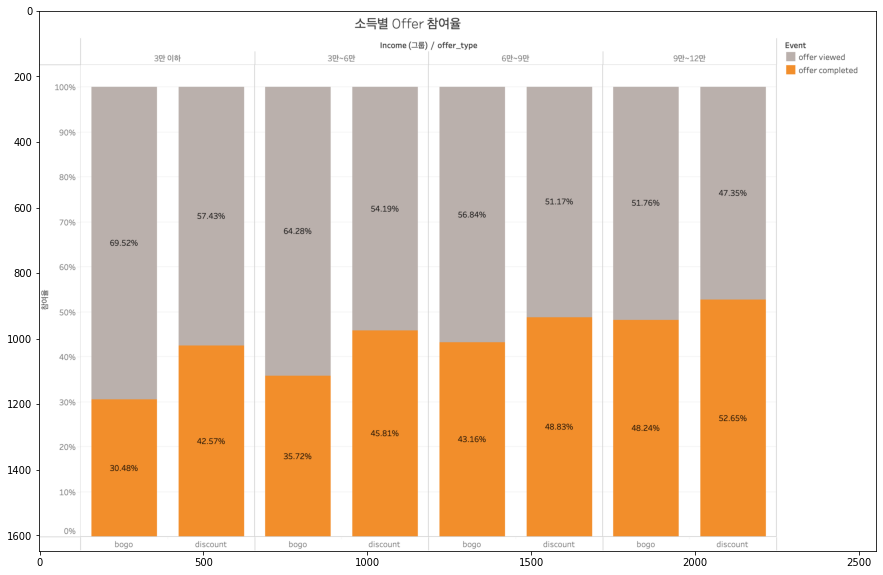

In [42]:
#소득별 offer 참여율
img_offer = imread('income_offertype.png')
plt.figure(figsize=(15,13))
plt.imshow(img_offer)


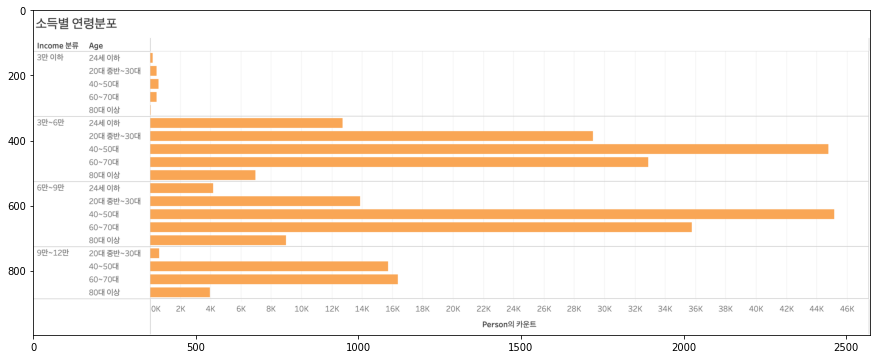

In [43]:
#소득별 연령분포
img_offer = imread('income_age.png')
plt.figure(figsize=(15,13))
plt.imshow(img_offer)


# Classification for effective promotion

### classification에 필요한 데이터 확인

In [44]:
profile #transcript와 join 할 column 확인

,Unnamed: 0,gender,age,id,became_member_on,income,age_range,income_categories
13612,13612,M,25,c100c7f877fd45d7ab09717bf812dc47,2017-04-13,30000.0,25-39,~3M
4241,4241,M,55,a1a85bdfc4644774aeaf1b75552e89ba,2018-02-19,30000.0,40-59,~3M
7574,7574,M,29,8b4fdc40b3fa43e0a3c392cc4048150e,2017-10-27,30000.0,25-39,~3M
231,231,M,71,18174519037241e9b1ddcb627ca4dc41,2018-03-21,30000.0,60-79,~3M
10022,10022,F,33,1f9b6e1cebeb48dcb6cd5965b408c989,2017-08-19,30000.0,25-39,~3M
...,...,...,...,...,...,...,...,...
5414,5414,F,69,f2c038ac9ea84e26bee2b0071be4edc6,2015-12-25,112000.0,60-79,~12M
5412,5412,F,77,1029b283ed2d4fa8b3a97e2063fc8d4e,2017-08-19,105000.0,60-79,~12M
5407,5407,M,54,c55582773fa24fb8a0e217851a2b23ae,2017-08-08,119000.0,40-59,~12M
5398,5398,O,61,c770251c32b84d59a17a8e591f9e0418,2016-11-02,98000.0,60-79,~12M


In [45]:
profile.rename(columns={'id':'person'},inplace=True)
profile #변경 완료

,Unnamed: 0,gender,age,person,became_member_on,income,age_range,income_categories
13612,13612,M,25,c100c7f877fd45d7ab09717bf812dc47,2017-04-13,30000.0,25-39,~3M
4241,4241,M,55,a1a85bdfc4644774aeaf1b75552e89ba,2018-02-19,30000.0,40-59,~3M
7574,7574,M,29,8b4fdc40b3fa43e0a3c392cc4048150e,2017-10-27,30000.0,25-39,~3M
231,231,M,71,18174519037241e9b1ddcb627ca4dc41,2018-03-21,30000.0,60-79,~3M
10022,10022,F,33,1f9b6e1cebeb48dcb6cd5965b408c989,2017-08-19,30000.0,25-39,~3M
...,...,...,...,...,...,...,...,...
5414,5414,F,69,f2c038ac9ea84e26bee2b0071be4edc6,2015-12-25,112000.0,60-79,~12M
5412,5412,F,77,1029b283ed2d4fa8b3a97e2063fc8d4e,2017-08-19,105000.0,60-79,~12M
5407,5407,M,54,c55582773fa24fb8a0e217851a2b23ae,2017-08-08,119000.0,40-59,~12M
5398,5398,O,61,c770251c32b84d59a17a8e591f9e0418,2016-11-02,98000.0,60-79,~12M


In [46]:
#profile&transcript join하기
join_person = pd.merge(transcript, profile, how="left", on="person")

In [47]:
join_person = join_person[['event','gender','age','income']] #classification을 위한 데이터 완성(필요한 데이터만 남김)
join_person = join_person.dropna() #결측치 제거
join_person

,event,gender,age,income
0,offer received,F,75.0,100000.0
2,offer received,M,68.0,70000.0
5,offer received,M,65.0,53000.0
7,offer received,M,58.0,51000.0
8,offer received,F,61.0,57000.0
...,...,...,...,...
306527,offer completed,F,48.0,80000.0
306529,transaction,M,66.0,47000.0
306530,transaction,M,52.0,62000.0
306531,transaction,F,63.0,52000.0


In [48]:
#transaction: information promotion이므로 promotion에 필요없어서 삭제
transaction=join_person[join_person['event']=='transaction'].index
join_person = join_person.drop(transaction)
join_person['event'].value_counts()

offer received     66501
offer viewed       49860
offer completed    32444
Name: event, dtype: int64

In [49]:
#범주형 데이터 더미 변수로 변경
join_person['event']=join_person['event'].replace({'offer received':0, 'offer viewed':0, 'offer completed':1})
join_person['gender']=join_person['gender'].replace({'F':0,'M':1,'O':2})
join_person

,event,gender,age,income
0,0,0,75.0,100000.0
2,0,1,68.0,70000.0
5,0,1,65.0,53000.0
7,0,1,58.0,51000.0
8,0,0,61.0,57000.0
...,...,...,...,...
306483,0,0,64.0,113000.0
306490,0,1,51.0,68000.0
306507,0,0,60.0,64000.0
306509,1,1,39.0,39000.0


In [50]:
#gender에서 'O'는 1%에 불과하고, 마케팅의 타겟으로 일반적으로 사용하지 않으므로 'O' 값을 갖는 행은 삭제

#join_person['gender']=join_person[join_person['gender']!='O'].gender.apply(lambda x:x)
#join_person=join_person.dropna()
#join_person['gender'].value_counts()

### 상관관계 분석
: 매우 낮음

In [ ]:
join_person.corr()

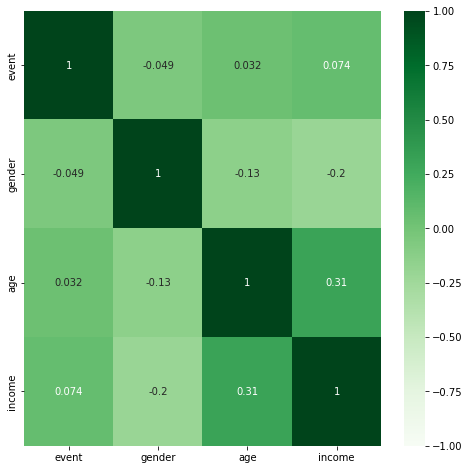

In [52]:
plt.rcParams["figure.figsize"]=(8,8)
sns.heatmap(join_person.corr(),
            annot = True,
            cmap = 'Greens',
            vmin = -1, vmax=1
            )

### 독립변수, 종속변수 나누기

In [123]:
X = join_person.drop(columns=['event'])
X.shape
X

,gender,age,income
0,0,75.0,100000.0
2,1,68.0,70000.0
5,1,65.0,53000.0
7,1,58.0,51000.0
8,0,61.0,57000.0
...,...,...,...
306483,0,64.0,113000.0
306490,1,51.0,68000.0
306507,0,60.0,64000.0
306509,1,39.0,39000.0


In [122]:
y = join_person.event
y.shape
y

0         0
2         0
5         0
7         0
8         0
         ..
306483    0
306490    0
306507    0
306509    1
306527    1
Name: event, Length: 148805, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#,shuffle=True

(104163, 3) (104163,)
(44642, 3) (44642,)


### 로지스틱: X

In [ ]:
#안돌아가면 설치하세요 :)
#!pip install --upgrade category_encoders 

In [59]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix

In [128]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [129]:
y_lrc_pred = lr.predict(X_test)
print("예측값 : ", y_lrc_pred)

예측값 :  [0 0 0 ... 0 0 0]


In [132]:
from sklearn.metrics import accuracy_score
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("Accuracy(정확도) : %.4f" %lrc_acc)

Accuracy(정확도) : 0.7828


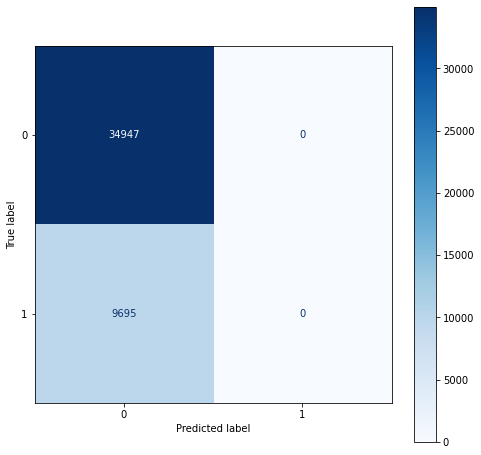

In [130]:
pipe = make_pipeline(OrdinalEncoder(), SimpleImputer(), LogisticRegression())
pipe.fit(X_train, y_train)
plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Blues)

In [131]:
from sklearn.metrics import classification_report
# (import precision_score, recall_score, f1_score, fbeta_score)

y_lrc_pred = pipe.predict(X_test)

print(classification_report(y_test, y_lrc_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     34947
           1       0.00      0.00      0.00      9695

    accuracy                           0.78     44642
   macro avg       0.39      0.50      0.44     44642
weighted avg       0.61      0.78      0.69     44642



### Decsion Tree

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [134]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape, 
      y_train.shape, 
      X_test.shape, 
      y_test.shape)

(104163, 3) (104163,) (44642, 3) (44642,)


In [138]:
dsTreeClf = tree.DecisionTreeClassifier()
_ = dsTreeClf.fit(X_train, y_train)
ds_pred = dsTreeClf.predict(X_test)
ds_accuracy = accuracy_score(y_test, ds_pred)
ds_error = 1 - ds_accuracy
kcc_acc = accuracy_score(y_test, ds_pred)
print("Accuracy(정확도) : %.4f" %kcc_acc) #from sklearn.metrics import accuracy_score / print(ds_accuracy, ds_error)

Accuracy(정확도) : 0.7794


In [136]:
confusion_matrix(y_test,ds_pred)

array([[34782,   197],
       [ 9650,    13]])

In [69]:
#!pip install category_encoders
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix

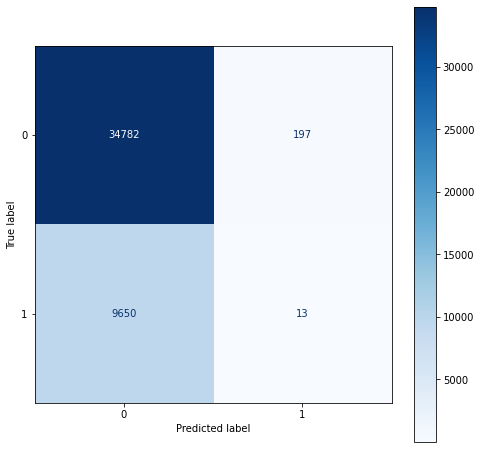

In [137]:
plot_confusion_matrix(dsTreeClf.fit(X_train, y_train),X_test,y_test,cmap=plt.cm.Blues)

In [71]:
from sklearn.metrics import classification_report
print('---Decision Tree Classification Report---')
print(classification_report(y_test, ds_pred))

---Decision Tree Classification Report---
              precision    recall  f1-score   support

           0       0.78      0.99      0.88     34979
           1       0.06      0.00      0.00      9663

    accuracy                           0.78     44642
   macro avg       0.42      0.50      0.44     44642
weighted avg       0.63      0.78      0.69     44642



In [72]:
dsTreeClf = tree.DecisionTreeClassifier()
_ = dsTreeClf.fit(X_train, y_train)
ds_pred = dsTreeClf.predict(X_test)
ds_accuracy = accuracy_score(y_test, ds_pred)
ds_error = 1 - ds_accuracy
print(ds_accuracy, ds_error)

0.7794229649209264 0.22057703507907356


### KNN
: confusion matrix 만들기

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [75]:
y_knn_pred = knn.predict(x_test)
print("예측값 : ", y_knn_pred)

예측값 :  [0 0 0 ... 0 1 0]


In [76]:
from sklearn.metrics import accuracy_score
kcc_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy(정확도) : %.4f" %kcc_acc)

Accuracy(정확도) : 0.7587


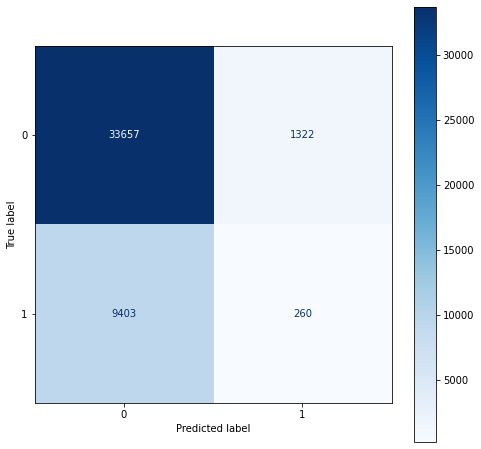

In [77]:
plot_confusion_matrix(knn.fit(X_train, y_train),X_test,y_test,cmap=plt.cm.Blues)

### 랜덤포레스트

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 10, oob_score = True)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=10)

In [79]:
y_rfc_pred = rfc.predict(X_test)
print("예측값 : ", y_rfc_pred)

예측값 :  [0 0 0 ... 0 0 0]


In [80]:
from sklearn.metrics import accuracy_score
random_acc = accuracy_score(y_test, y_rfc_pred)
print("Accuracy(정확도) : %.4f" %kcc_acc)

Accuracy(정확도) : 0.7587


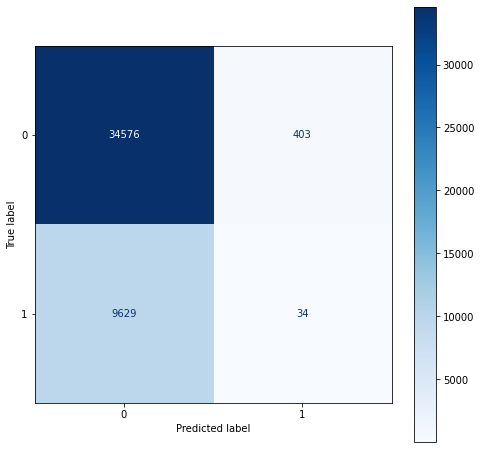

In [81]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix

pipe = make_pipeline(OrdinalEncoder(), SimpleImputer(), RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 10, oob_score = True))
pipe.fit(X_train, y_train)
plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Blues)

SVM #느림

In [142]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [143]:
y_svc_pred = svc.predict(X_test)
print("예측값 : ", y_svc_pred)

예측값 :  [0 0 0 ... 0 0 0]


In [144]:
from sklearn.metrics import accuracy_score
kcc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy(정확도) : %.4f" %kcc_acc)

Accuracy(정확도) : 0.7835


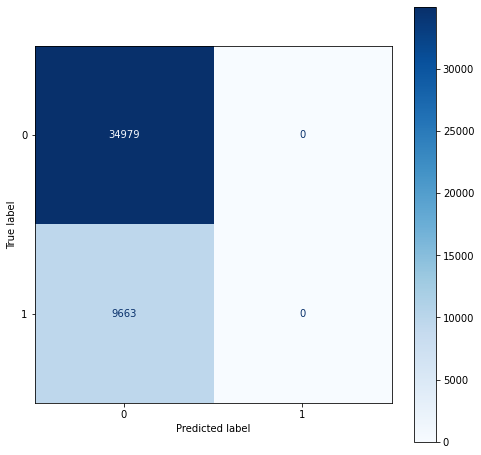

In [145]:
plot_confusion_matrix(svc.fit(X_train, y_train),X_test,y_test,cmap=plt.cm.Blues)

앙상블

In [ ]:
gbClf = ensemble.GradientBoostingClassifier()
_ = gbClf.fit(X_train, y_train)
gb_pred = gbClf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_error = 1 - gb_accuracy

print(gb_accuracy, gb_error)

In [ ]:
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))

In [ ]:
plot_confusion_matrix(gbClf.fit(X_train, y_train),X_test,y_test,cmap=plt.cm.Blues)

# Satisfactory survey Classification

## 1. 전처리

In [ ]:
import pandas as pd
survey = pd.read_csv('Starbucks satisfactory survey.csv', encoding = 'utf8')

In [ ]:
survey.columns = [
              "timestamp", "gender",  "age",  "occupation", "income_rm", 
              "visit_frequency", "most_used_service", 'time_spent_per_visit', 
              "distance_from_shop",  "member",  "most_purchased_item",  
              "average_amount_spent_rm",  "brand_rating_comparison", 
              "price_rating",  "sales_promotions_influence",  
              "ambience_rating", "wifi_rating", "service_rating", 
              "preferred_social_hangout",  "referral",  "continued_patronage"
              ]

In [ ]:
survey.isnull().sum()

In [ ]:
survey = survey.dropna() #이 데이터로 분석

In [92]:
#survey=survey.drop(['timestamp'],axis=1)

Classification

(1) 독립변수: 1~11 종속변수:12-18

### numeric data 로 변경

In [93]:
survey = survey.drop(['timestamp','visit_frequency','most_used_service','time_spent_per_visit','distance_from_shop','most_purchased_item','referral'],axis=1)

In [94]:
#1번째 column
survey['gender'].value_counts()
#Female과 Male

Female    65
Male      56
Name: gender, dtype: int64

In [95]:
survey.loc[survey['gender']=='Female','gender']=0
survey.loc[survey['gender']=='Male','gender']=1

survey['gender'].value_counts()

0    65
1    56
Name: gender, dtype: int64

In [96]:
#2번째 column
survey['age'].value_counts()

From 20 to 29    84
From 30 to 39    17
Below 20         13
40 and above      7
Name: age, dtype: int64

In [97]:
survey.loc[survey['age']=='From 20 to 29','age']=0
survey.loc[survey['age']=='From 30 to 39','age']=1
survey.loc[survey['age']=='Below 20','age']=2
survey.loc[survey['age']=='40 and above','age']=3

survey['age'].value_counts()

0    84
1    17
2    13
3     7
Name: age, dtype: int64

In [98]:
#3번째 column
survey['occupation'].value_counts()

Employed         60
Student          42
Self-employed    17
Housewife         2
Name: occupation, dtype: int64

In [99]:
survey.loc[survey['occupation']=='Employed','occupation']=0
survey.loc[survey['occupation']=='Student','occupation']=1
survey.loc[survey['occupation']=='Self-employed','occupation']=2
survey.loc[survey['occupation']=='Housewife','occupation']=3

survey['occupation'].value_counts()

0    60
1    42
2    17
3     2
Name: occupation, dtype: int64

In [100]:
#4번째 column
survey['income_rm'].value_counts()

Less than RM25,000       70
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
Name: income_rm, dtype: int64

In [101]:
survey.loc[survey['income_rm']=='Less than RM25,000','income_rm']=0
survey.loc[survey['income_rm']=='RM25,000 - RM50,000','income_rm']=1
survey.loc[survey['income_rm']=='RM50,000 - RM100,000','income_rm']=2
survey.loc[survey['income_rm']=='More than RM150,000','income_rm']=3
survey.loc[survey['income_rm']=='RM100,000 - RM150,000','income_rm']=4

survey['income_rm'].value_counts()

0    70
1    25
2    17
3     6
4     3
Name: income_rm, dtype: int64

In [102]:
#9번째 column
survey['member'].value_counts()

No     61
Yes    60
Name: member, dtype: int64

In [103]:
survey.loc[survey['member']=='Yes','member']=0
survey.loc[survey['member']=='No','member']=1

survey['member'].value_counts()

1    61
0    60
Name: member, dtype: int64

In [104]:
#11번째 column
survey['average_amount_spent_rm'].value_counts()

Less than RM20        58
Around RM20 - RM40    45
Zero                  11
More than RM40         7
Name: average_amount_spent_rm, dtype: int64

In [105]:
survey.loc[survey['average_amount_spent_rm']=='Less than RM20','average_amount_spent_rm']=0
survey.loc[survey['average_amount_spent_rm']=='Around RM20 - RM40','average_amount_spent_rm']=1
survey.loc[survey['average_amount_spent_rm']=='Zero','average_amount_spent_rm']=2
survey.loc[survey['average_amount_spent_rm']=='More than RM40','average_amount_spent_rm']=3

survey['continued_patronage'].value_counts()

Yes    94
No     27
Name: continued_patronage, dtype: int64

In [106]:
#20번째 column
survey['continued_patronage'].value_counts()

Yes    94
No     27
Name: continued_patronage, dtype: int64

In [107]:
survey.loc[survey['continued_patronage']=='Yes','continued_patronage']=0
survey.loc[survey['continued_patronage']=='No','continued_patronage']=1

survey['continued_patronage'].value_counts()

0    94
1    27
Name: continued_patronage, dtype: int64

In [108]:
survey.info()

#dtype = object 인 column을 int64로 변경

survey = survey.astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      121 non-null    object
 1   age                         121 non-null    object
 2   occupation                  121 non-null    object
 3   income_rm                   121 non-null    object
 4   member                      121 non-null    object
 5   average_amount_spent_rm     121 non-null    object
 6   brand_rating_comparison     121 non-null    int64 
 7   price_rating                121 non-null    int64 
 8   sales_promotions_influence  121 non-null    int64 
 9   ambience_rating             121 non-null    int64 
 10  wifi_rating                 121 non-null    int64 
 11  service_rating              121 non-null    int64 
 12  preferred_social_hangout    121 non-null    int64 
 13  continued_patronage         121 non-null    object

### Random Forest&Decsion Tree

In [109]:
#age와 gender를 통한 promotion 만족도
X = survey.drop(columns=['continued_patronage','occupation','income_rm','average_amount_spent_rm','brand_rating_comparison','price_rating',
                          'sales_promotions_influence','ambience_rating','wifi_rating','service_rating','preferred_social_hangout'])
X.shape
X

,gender,age,member
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,1,0,1
...,...,...,...
117,1,3,0
118,1,0,0
119,1,0,1
120,0,0,1


In [110]:
#age와 gender, income, job를 통한 promotion 만족도
X = survey.drop(columns=['continued_patronage','member','average_amount_spent_rm','brand_rating_comparison','price_rating',
                          'sales_promotions_influence','ambience_rating','wifi_rating','service_rating','preferred_social_hangout'])
X.shape
X

,gender,age,occupation,income_rm
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,1,0
...,...,...,...,...
117,1,3,2,1
118,1,0,0,0
119,1,0,1,0
120,0,0,0,0


In [111]:
y = survey.sales_promotions_influence
y.shape
y

0      5
1      4
2      4
3      4
4      4
      ..
117    5
118    5
119    4
120    4
121    5
Name: sales_promotions_influence, Length: 121, dtype: int64

In [112]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(X, y)

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape, 
      y_train.shape, 
      X_test.shape, 
      y_test.shape)



(84, 4) (84,) (37, 4) (37,)


In [115]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=가지갯수 None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
dsTreeClf = tree.DecisionTreeClassifier(max_depth=2)
_ = dsTreeClf.fit(X_train, y_train)
ds_pred = dsTreeClf.predict(X_test)
ds_accuracy = accuracy_score(y_test, ds_pred)
ds_error = 1 - ds_accuracy
print(ds_accuracy, ds_error)

0.35135135135135137 0.6486486486486487


In [117]:
from sklearn import ensemble

In [118]:
rfClf = ensemble.RandomForestClassifier()
_ = rfClf.fit(X_train, y_train)
rf_pred = rfClf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_error = 1 - rf_accuracy
print(rf_accuracy, rf_error)

0.24324324324324326 0.7567567567567568


In [119]:
from sklearn.metrics import classification_report
print('---Decision Tree Classification Report---')
print(classification_report(y_test, ds_pred))
print('---Random Forest Classification Report---')
print(classification_report(y_test, rf_pred))

---Decision Tree Classification Report---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.36      0.82      0.50        11
           5       0.33      0.25      0.29        16

    accuracy                           0.35        37
   macro avg       0.17      0.27      0.20        37
weighted avg       0.25      0.35      0.27        37

---Random Forest Classification Report---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         9
           4       0.36      0.73      0.48        11
           5       0.14      0.06      0.09        16

    accuracy                           0.24        37
   macro avg       0.10      0.16      0.11        37
weighted avg       0.17      0.24      0.18    

IndexError: ignored

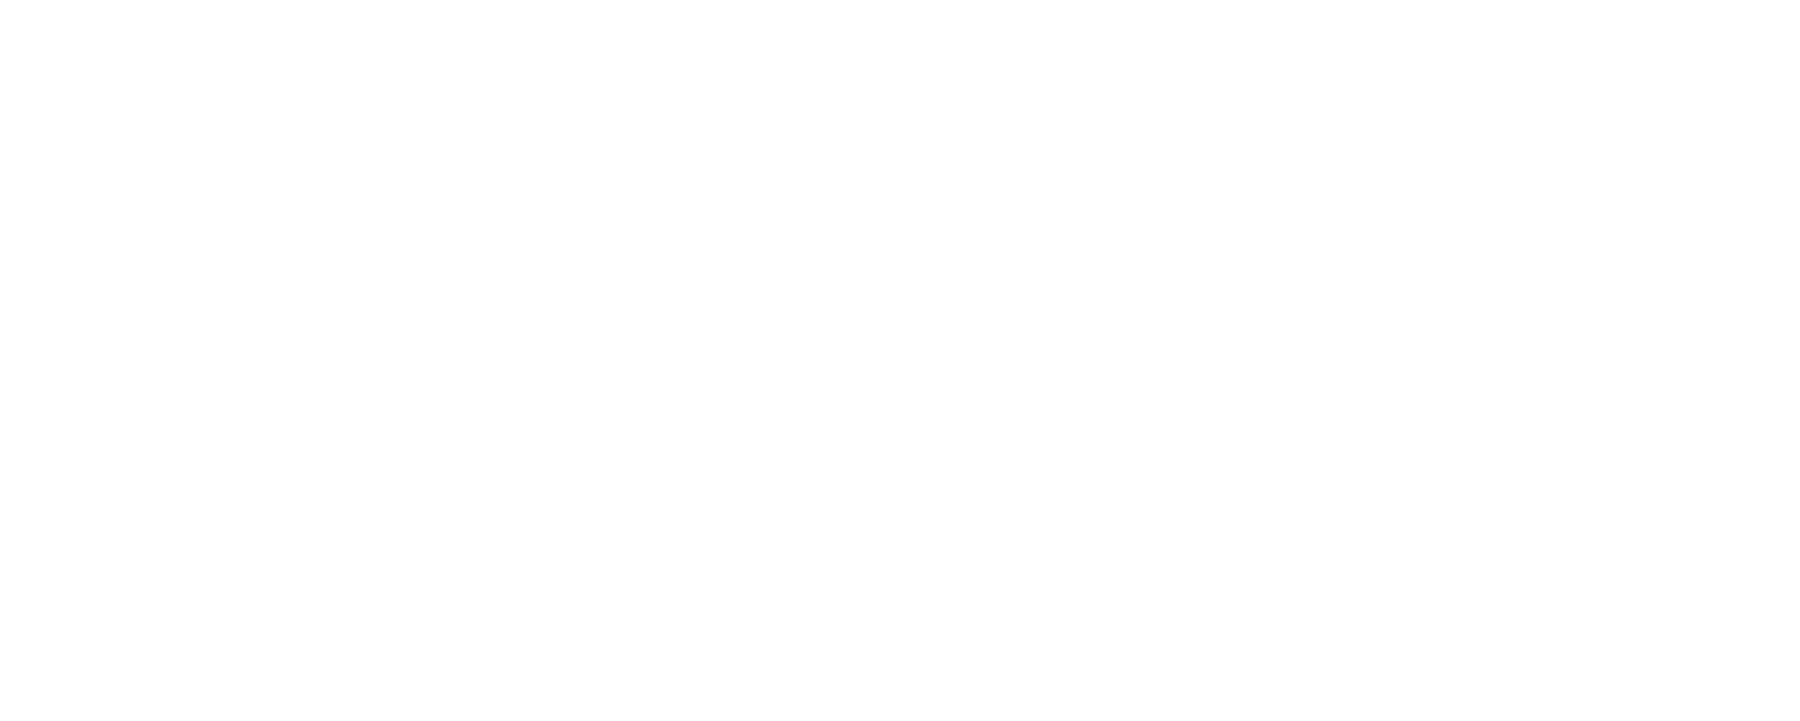

In [120]:
## Plot Tree with plot_tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(32, 13))
_ = tree.plot_tree(dsTreeClf,  # 모델명
                  feature_names=['gender','age'], # 변수명
                  class_names=['1','2','3','4','5'], # 클래스 종류
                  filled=True)

In [ ]:
#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=가지갯수 None,
#          min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
 #           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
  #          splitter='best')

In [ ]:
X = survey.drop(columns=['continued_patronage'])
X.shape
X

In [ ]:
y = survey.continued_patronage
y.shape
y

In [ ]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape, 
      y_train.shape, 
      X_test.shape, 
      y_test.shape)

In [ ]:
dsTreeClf = tree.DecisionTreeClassifier(max_depth=2)
_ = dsTreeClf.fit(X_train, y_train)
ds_pred = dsTreeClf.predict(X_test)
ds_accuracy = accuracy_score(y_test, ds_pred)
ds_error = 1 - ds_accuracy
print(ds_accuracy, ds_error)

In [ ]:
rfClf = ensemble.RandomForestClassifier()
_ = rfClf.fit(X_train, y_train)
rf_pred = rfClf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_error = 1 - rf_accuracy
print(rf_accuracy, rf_error)

In [ ]:
from sklearn.metrics import classification_report
print('---Decision Tree Classification Report---')
print(classification_report(y_test, ds_pred))
print('---Random Forest Classification Report---')
print(classification_report(y_test, rf_pred))

------------

In [ ]:
X = survey.drop(columns=['continued_patronage'])
X.shape
X

In [ ]:
## Plot Tree with plot_tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(32, 13))
_ = tree.plot_tree(dsTreeClf,  # 모델명
                  feature_names=['gender','age','continued_patronage','occupation','income_rm','member','average_amount_spent_rm','brand_rating_comparison','price_rating',
                                 'sales_promotions_influence','ambience_rating','wifi_rating','service_rating','preferred_social_hangout'], # 변수명
                  class_names=['yes','no'], # 클래스 종류
                  filled=True)

In [ ]:
#age와 gender, income를 통한 promotion 만족도
X = survey.drop(columns=['continued_patronage','occupation','member','average_amount_spent_rm','brand_rating_comparison','price_rating',
                          'sales_promotions_influence','ambience_rating','wifi_rating','service_rating','preferred_social_hangout'])
X.shape
X

## Correlation

In [ ]:
#전체 상관관계
survey.corr(method='pearson')

In [ ]:
plt.rcParams["figure.figsize"]=(10,10)
sns.heatmap(survey.corr(),
            annot = True,
            cmap = 'Greens',
            vmin = -1, vmax=1
            )

In [ ]:
survey1 = survey.drop(['brand_rating_comparison','price_rating', 'sales_promotions_influence','ambience_rating','wifi_rating','service_rating','preferred_social_hangout'],axis=1)

survey1.corr(method='pearson')

#*제외*
#gender: gender_value_counts가 거의 절반씩 분포
#occupation: occupation의 분류가 너무 세부적임
#income_rm

#확인 필요
#age: 
#income:
#member: okay! 
#average_amount_spent_rm: 비용을 많이 쓸수록 스타벅스에 지속적으로 갈 확률이 클 것이다.

In [ ]:
survey2 = survey.drop(['gender','age', 'occupation','income_rm','member','average_amount_spent_rm','continued_patronage'],axis=1)

survey2.corr(method='pearson')

# 